## Region of interest
![image info](./notebook/eleven.jpg)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY);
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur,50,150)
    return canny
def region_of_interest(image):
    height=image.shape[0]
    polygons=np.array([
        (200,height),(1100,height),(550,250)
    ])
    mask=np.zeros_like(image)
    #fillPoly(image_destinity,area_apply,intensity)
    cv2.fillPoly(mask,[polygons],255)
    #apply the operation AND between the mask and canny image
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

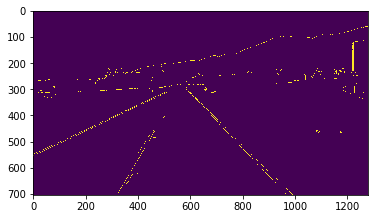

In [15]:
image=cv2.imread("test_image.jpg")
lane_image=np.copy(image)
canny=canny(lane_image)
plt.imshow(canny)
plt.show()

We want this area
    ![image info](./notebook/twelve.jpg)

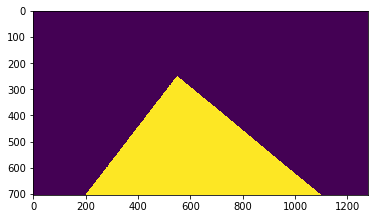

In [9]:
#Mask apply to canny
mask=region_of_interest(canny)
plt.imshow(mask)

Apply the operation AND between the bits the canny image and the mask
![image info](./notebook/bits.jpg)
Computing the bitwise & of both images as we saw earlier in the theory section, take the bitwise & of each homologus pixel in both arrays, ultimatly masking the canny image to only show the region of interest traced by the polygonal contour of the mask

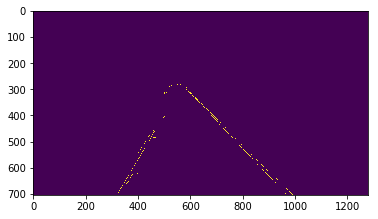

In [16]:
cropped_image=region_of_interest(canny)
plt.imshow(cropped_image)